In [2]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps #bibliothèque proposant densités, fonctions  de répartition, quantiles, etc... de lois usuelles.


Dans ce document, on commence par donner quelques exemples d'applications du cours. On se servira des trois librairies ci-dessus. On peut déjà commencer par initialiser le générateur de nombres aléatoires :

In [174]:
np.random.seed(1234)

# Préambule : Loi uniforme

Génerons un échantillon de 50 nombres uniformes sur $]0,1[$, calculons sa moyenne, sa variance et représentons son histogramme et la densité cible :

0.5225428431272675
0.07187972860299881


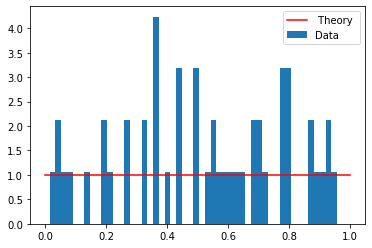

In [175]:
u = np.random.rand(50)
print(np.mean(u))
print(np.var(u))
x = np. linspace (0,1,100)
f_x = sps.uniform.pdf(x) #Densite uniforme
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(u,bins = 50,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

On augmente la taille de l'échantillon :

0.5139008431411258
0.08939613411009849


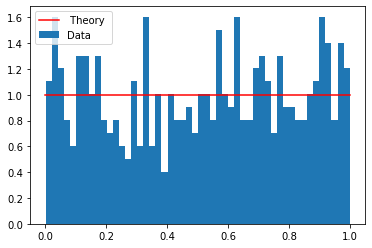

In [176]:
u = np.random.rand(500)
print(np.mean(u))
print(np.var(u))
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(u,bins = 50,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

On voit que l'estimation des moments se fait plus précise à mesure que la taille de l'échantillon augmente. L'histogramme se rapproche également de la densité cible.

0.48552465132260086
0.0856275002546009


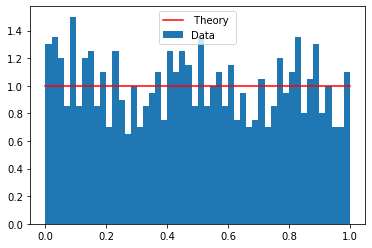

In [177]:
u = np.random.rand(1000)
print(np.mean(u))
print(np.var(u))
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(u,bins = 50,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

# Méthode d'inversion

## Loi exponentielle

On va transformer cet échantillon pour produire des réalisations de la loi exponentielle de paramètre $\lambda$ par la méthode d'inversion. Soit $X$ une variable aléatoire de loi exponentielle de paramètre $\lambda$. Sa fonction de répartition est donnée par :
$$F_X(x) = 1 - \exp(-\lambda x),~~x\in \mathbb{R}_+$$
Pour calculer son inverse, on résoud $u =  1 - \exp(-\lambda x)$. On trouve ainsi
$$x = -\frac{1}{\lambda}\log(1-u)$$
que l'on peut simplifier en
$$x = -\frac{1}{\lambda}\log(u)$$
puisque si $U\sim \mathcal{U}_{]0,1[}$, alors $1-U \sim \mathcal{U}_{]0,1[}$.

Pour générer un échantillon de réalisations de la loi exponentielle de paramètre $\lambda$, on applique donc cette transformation à un échantillon de réalisations de la loi uniforme sur $]0,1[$.

In [178]:
param = 1
y = -1/param * np.log(np.random.rand(1000))

De même, on peut réprésenter son histogramme et y superposer la densité exponentielle

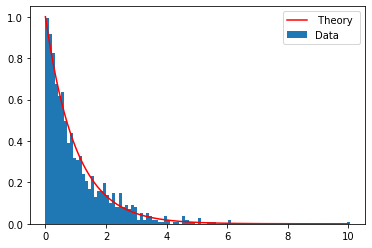

In [179]:
x = np. linspace (0,10,1000)
f_x = sps.expon.pdf(x) #Densite exponentielle
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(y,bins = 100,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

En pratique, on utilisera plutôt les fonctions internes de numpy pour simuler des réalisations selon les lois usuelles. Voir :

https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html

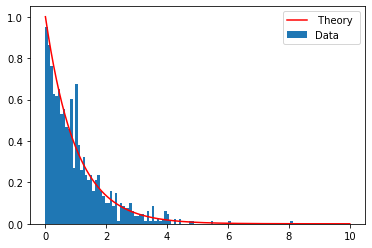

In [180]:
x = np. linspace (0,10,1000)
f_x = sps.expon.pdf(x) #Densite exponentielle
y = np.random.exponential(param,1000)
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(y,bins = 100,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

## Loi uniforme dans un domaine 
### Domaine A

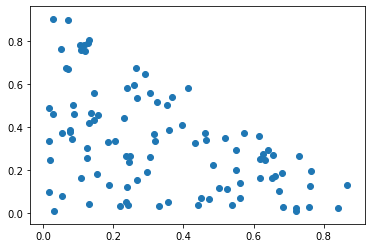

In [181]:
n=100

def rtri(n):
    x=np.empty([n,2])
    i=0
    while i < n :
	    u1 = np.random.rand(1)
	    u2 = np.random.rand(1)
	    if u2<1-u1 :
		    x[i,0] = u1
		    x[i,1] = u2
		    i=i+1
	
    return x	

tri = rtri(n)

plt.scatter(tri[:,0],tri[:,1],)
plt.show()

### Domaine B

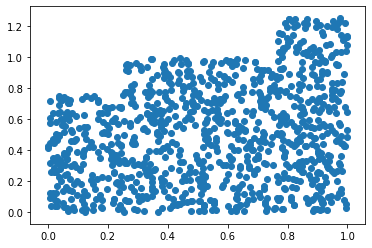

In [3]:
n=1000
def rB(n):
    x=np.empty([n,2])
    i=0
    while i < n :
	    u1 = np.random.rand(1)
	    u2 = 1.25*np.random.rand(1)
	    if not ((u1<0.25) and (u2>0.75)) and  not ((u1> 0.25) and (u1< 0.75) and (u2>1)) :
		    x[i,0] = u1
		    x[i,1] = u2
		    i=i+1
	
    return x	

B = rB(n)

plt.scatter(B[:,0],B[:,1],)
plt.show()

### domaine C

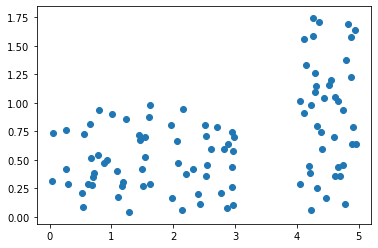

In [183]:
n=100
def rC(n):
    x=np.empty([n,2])
    i=0
    while i < n :
	    u1 = 5*np.random.rand(1)
	    u2 = 2*np.random.rand(1)
	    if ((u1<3) and (u2<1)) or (u1> 4) :
		    x[i,0] = u1
		    x[i,1] = u2
		    i=i+1
	
    return x	

C = rC(n)

plt.scatter(C[:,0],C[:,1],)
plt.show()

## Simulation selon la loi géométrique
### Question 2

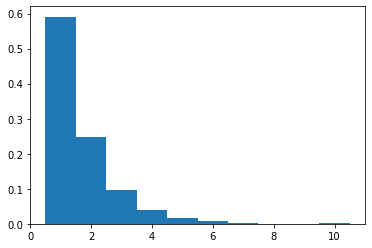

In [184]:
n=1000
p=0.6
q=0.4
def rgeom(n,p):
    x=np.empty(n)
    for i in range(n) :
	    ok= False
	    k=0
	    while not ok :
		    ok=(np.random.rand(1)<p)
		    k=k+1
	
	    x[i]=k

    return x

y = rgeom(n,p)

# Empirical (experimental) mean
np.mean(y)
# Expectation (theoretical mean)
1/p
# or equivalently
1/(1-q)
	
# Empirical variance
np.var(y)
# Theoretical variance
(1-p)/p**2
# or equivalently
q/(1-q)**2

# Empirical c.d.f.
d = np.diff(np.unique(y)).min()
left_of_first_bin = y.min() - float(d)/2
right_of_last_bin = y.max() + float(d)/2
plt.hist(y, np.arange(left_of_first_bin, right_of_last_bin + d, d),density = True)
plt.show()


### Question 4

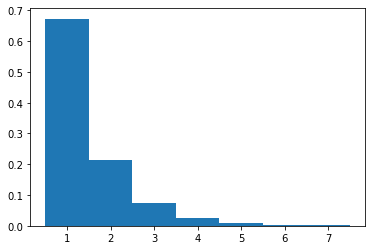

In [185]:
n = 1000
lambd = -np.log(1-p)
y = np.ceil(np.random.exponential(lambd,n))
# Empirical (experimental) mean
np.mean(y)
# Expectation (theoretical mean)
1/p
# or equivalently
1/(1-q)
	
# Empirical variance
np.var(y)
# Theoretical variance
(1-p)/p**2
# or equivalently
q/(1-q)**2

# Empirical c.d.f.
d = np.diff(np.unique(y)).min()
left_of_first_bin = y.min() - float(d)/2
right_of_last_bin = y.max() + float(d)/2
plt.hist(y, np.arange(left_of_first_bin, right_of_last_bin + d, d),density = True)
plt.show()

## Simulation de la loi gaussienne par la méthode du rejet
### Question 4
On rappelle qu'une variable de loi de Laplace peut s'obtenir à partir d'une variable uniforme sur ]0,1[ de la manière suivante : 
$X = \text{sgn}(U - 1/2)\ln(1-2|U-1/2|)$

In [186]:

u = 2*np.sqrt(np.exp(1)/(2*np.pi))
print(u)

1.315489246958914


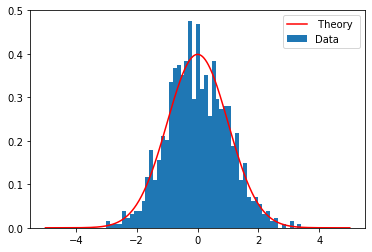

In [187]:
# function simulating n symmetric
# exponential variables (Laplace distribution)
# with parameter 1

def rlaplace(n):
    u = np.random.rand(n)
    x = np.sign(u-1/2)*np.log(1-2*np.abs(u-1/2))
    return x 

# function simulating n Gaussian random variables
# with mean 0 and variance 1 by rejection algorithm

def rgaussian(n):
    C=2*np.sqrt(np.exp(1)/(2*np.pi)) # 
    x=np.empty(n)

    for i in range(n) :
	    y=rlaplace(1) # simulation of the laplace
	    u=np.random.rand(1)  # simulation of a uniform (0,1)
	    a=u*1/2*np.exp(-np.abs(y))*C

	    while a>sps.norm.pdf(y) :
		    y=rlaplace(1)
		    u=np.random.rand(1)
		    a=u*1/2*np.exp(-np.abs(y))*C
	
	    x[i]=y

    return x

# Test of the function
n=1000

y=rgaussian(n)
x = np. linspace (-5,5,n)
plt.plot(x,sps.norm.pdf(x),"r",label =" Theory ")
plt.hist(y,50,density=True, label = "Data")
plt.legend(loc="best")
plt.show()


## Simulation de la loi de Wigner

La loi de Wigner (ou du demi-cercle) est la loi de support $[-2, 2]$ et de densité $f(x) = \frac{1}{2\pi}\sqrt{4 - x^2}$.
Pour simuler selon une densité $f$ à support compact $C$, le plus simple est d'utiliser une loi uniforme sur ce même compact comme densité instrumentale et de prendre $\sup_{x\in C}f(x)$ comme constante pour la majoration (en ignorant la constante de normalisation de l'uniforme 1/|C|).
Ici cette constante vaut $1/\pi$.

In [188]:
n = 1000 #taille de l'échantillon

# densité de Wigner
def dwigner(x):
    return (1/(2*np.pi))*np.sqrt(4-x**2)
    
a = 1/np.pi    
k = 0
y = np.empty([n,1])
while k < n:
    u = np.random.uniform(-2,2,1)
    v = np.random.rand(1)
    if v*a < dwigner(u):
        y[k] = u
        k = k+1

Représentation graphique

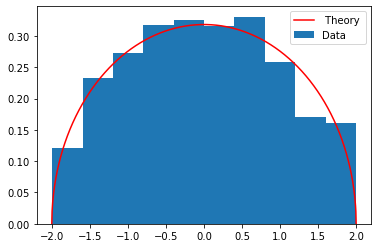

In [189]:
x = np. linspace (-2,2,1000)
f_x = dwigner(x)
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(y,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

## Loi des grands nombres et théorème central limite
### Question 1

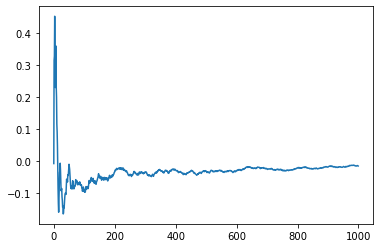

In [190]:
n = 1000
x = np.arange(n)
u = np.random.uniform(-1,1,n)
Sn = np.cumsum(u)/(1+x)
plt.plot(x,Sn)
plt.show()

### Question 2

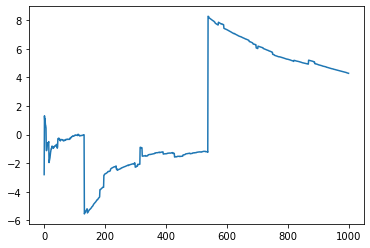

In [12]:
n = 1000
x = np.arange(n)
y = np.random.standard_cauchy(n)
Sn = np.cumsum(y)/(1+x)
plt.plot(x,Sn)
plt.show()

### Question 3
On a $\mu = 0$ et $\sigma = \sqrt{\mathbb{E}(X^2)} =\frac{1}{\sqrt{3}}$

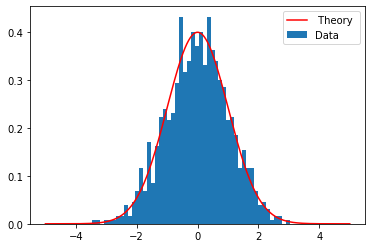

In [14]:
n = 1000
m = 1000
sigma = 1/np.sqrt(3)
y = np.empty(m)
for i in range(m) : 
    y[i] = np.sqrt(n)/sigma*(sum(np.random.uniform(-1,1,n))/n)

x = np. linspace (-5,5,n)
plt.plot(x,sps.norm.pdf(x),"r",label =" Theory ")
plt.hist(y,50,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

## Simulation d'un mélange de gaussienne
### Question 1

On illustre ici l'application de la méthode d'inversion pour la simulation d'une loi discrète. Soit $X$ une v.a.r. de loi :
$$\mathbb{P}(X=x) = \left\{\begin{array}{ll} 1/2 & \text{ si }x = 1 \\ 1/4 & \text{ si }x = 2 \\ 1/4 & \text{ si }x = 3 \\ 0 & \text{ sinon} \end{array} \right.$$
On commence par calculer les valeurs non triviales prises par sa fonction de répartition, puis on transforme les variables uniformes comme suit :

[0.5  0.75 1.  ]


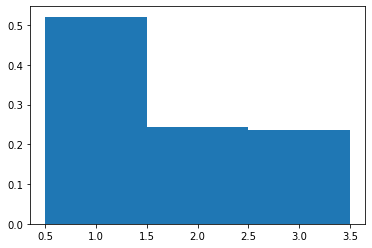

In [193]:
n=1000
p = np.cumsum([1/2,1/4,1/4])
u = np.random.rand(n)
print(p)
y = 1.*(u<p[0]) + 2.*(p[1]>u)*(u>p[0]) +3.*(u>p[1])
d = np.diff(np.unique(y)).min()
left_of_first_bin = y.min() - float(d)/2
right_of_last_bin = y.max() + float(d)/2
plt.hist(y, np.arange(left_of_first_bin, right_of_last_bin + d, d),density = True)
plt.show()

### Question 2
On peut alors s'en servir pour simuler, par exemple, selon un mélange des gaussiennes : $\mathcal{N}(0,1)$, $\mathcal{N}(5,1/2)$ et $\mathcal{N}(8,4)$, chacune associée à une des modalités de $K$.

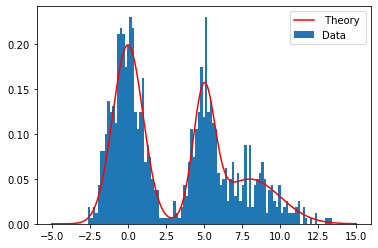

In [194]:
z = (y==1)*np.random.normal(0,1,n) + (y==2)*np.random.normal(5,np.sqrt(.5),n) + (y==3)*np.random.normal(8,np.sqrt(4),n)
x = np. linspace (-5,15,n)
f_x = .5*sps.norm.pdf(x) + .25*sps.norm.pdf(x,loc =5, scale = np.sqrt(.5)) + .25*sps.norm.pdf(x,8,np.sqrt(4)) #Densite du melange
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(z,bins = 100,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

# Echantillonnage d'importance

On cherche à évaluer l'espérance d'une variable aléatoire $X$ gaussienne centrée réduite (de densité $f_X$ et de f.d.r. $F_X$) sachant qu'elle dépasse la valeur 3. La densité conditionnelle s'écrit :

$$f_{X|X > 3}(x) = \frac{f_x(x)}{1-F_X(3)}1_{]3,+\infty[}(x)$$

et on veut estimer :

$$\mathbb{E}(X|X>3) = \int_{\mathbb{R}} x f_{X|X > 3}(x) dx$$

### Question 1

Si on implémente une méthode de rejet de manière naïve --- on tire des gaussiennes centrées réduites et on ne conserve que celles effectivement supérieures à 3 pour calculer l'espérance --- les estimations varient fortement d'un tirage à l'autre (on a même parfois des `nan`, lorsque l'échantillon ne contient aucune valeur supérieure à 3)  et le taux de rejet vaut :

In [195]:
n = 1000
X = np.random.standard_normal(n)
Econd = np.mean(X[X>3])
print(Econd)
sps.norm.cdf(3)

nan


0.9986501019683699

C'est donc peu efficace. 

### Question 3

On va donc tirer selon une loi instrumentale qui va mieux cibler la région d'intérêt, par exemple une gaussienne d'espérance 3 et de variance 1 (de densité notée $g$) et on utilisera alors l'estimateur :

$$\frac{\sum_{i=1}^{n}w_ih(X_i)}{\sum_{i=1}^n w_i}$$

avec les poids d'importance $w_i = \frac{f_{X|X > 3}(X_i)}{g(X_i)}$.

In [196]:
def dnormcond(x,s): ### densité conditionnelle
    return sps.norm.pdf(x)/(1.-sps.norm.cdf(s))*(x>s)

n = 100000

y = np.random.normal(3,1,n)

w = dnormcond(y,3)/sps.norm.pdf(y,3,1)

print(np.mean(w>0))

m = np.sum(w*y)/sum(w)

m


0.49999


3.2827819241950986

On peut représenter l'histogramme de l'échantillon pondéré (le poids $w_i$ est affecté à chaque simulation dans le calcul de l'histogramme) et le comparer à $f_{X|X > 3}(x)$

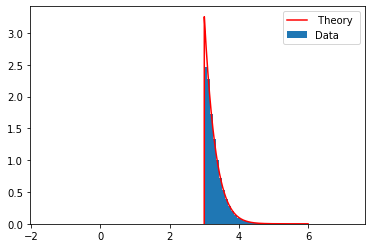

In [197]:
x = np.linspace(3,6,1000)
f_x = dnormcond(x,3)
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(y,density=True, bins = 100, weights=w, label = "Data")
plt.legend(loc="best")
plt.show()

### Calcul numérique d'une probabilité
La variable $1_{\sin(X)>1/2}$ où $X \sim \mathcal{N}(0,1)$ est bien $\mathcal{L}^1$ car bornée par 1 et donc la loi forte des grands nombres s'applique.

In [198]:
n=100000
np.mean(np.sin(np.random.standard_normal(n))>1/2)

0.29657

Visualisation de la convergence

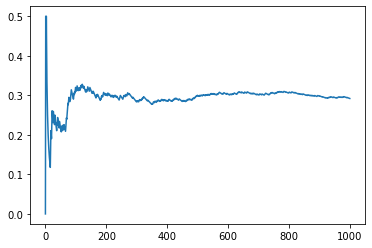

In [199]:
n=1000
x = np.arange(n)
Mn = np.cumsum(np.sin(np.random.standard_normal(n))>1/2)/(1+x)
plt.plot(x,Mn)
plt.show()